# LGM_Internship

## Task 2 : Stock Market Prediction using stacked LSTM algorithm
### - by Siddharth Gala

### Importing required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Reading the CSV file

In [ ]:
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
df = pd.read_csv(url)
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


### Exploratory Data Analysis

In [ ]:
df.shape

(2035, 8)

In [ ]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
df.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


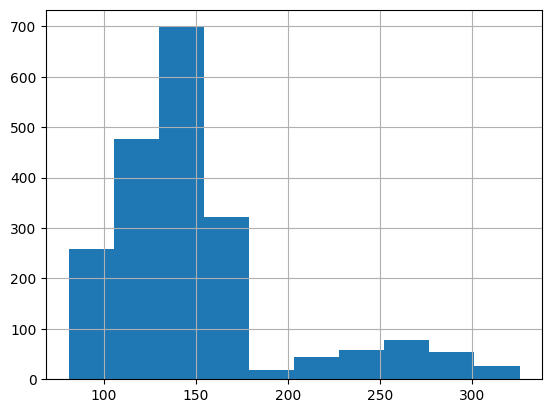

In [ ]:
df.Close.hist();

In [ ]:
data = pd.read_csv(url,
                 parse_dates=["Date"])
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data.Date.dtype

dtype('<M8[ns]')

In [ ]:
df.Date.dtype

dtype('O')

In [ ]:
data.Date.head()

0   2018-09-28
1   2018-09-27
2   2018-09-26
3   2018-09-25
4   2018-09-24
Name: Date, dtype: datetime64[ns]

In [ ]:
df.Date.head()

0    2018-09-28
1    2018-09-27
2    2018-09-26
3    2018-09-25
4    2018-09-24
Name: Date, dtype: object

In [ ]:
data.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
data.sort_values(by=["Date"], inplace=True, ascending=True)
data.Date.head()

2034   2010-07-21
2033   2010-07-22
2032   2010-07-23
2031   2010-07-26
2030   2010-07-27
Name: Date, dtype: datetime64[ns]

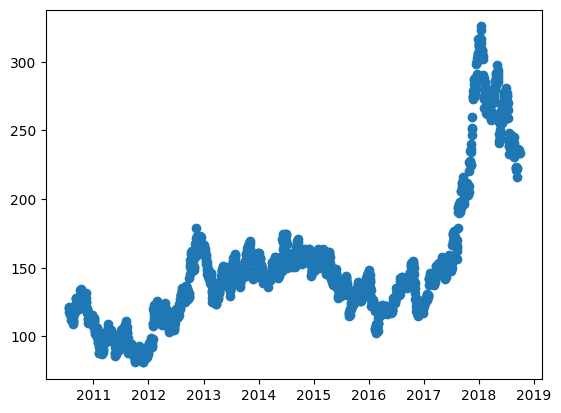

In [ ]:
fig, ax = plt.subplots()
ax.scatter(data.Date, data.Close);

In [ ]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [ ]:
copy_data = data.copy()
copy_data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [ ]:
copy_data.reset_index(inplace =True)
copy_data

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...,...
2030,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [ ]:
copy_data.drop("index", axis=1, inplace=True)

In [ ]:
copy_data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
2030,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [ ]:
copy_data.corr()

<ipython-input-26-550b3d2f75cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  copy_data.corr()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


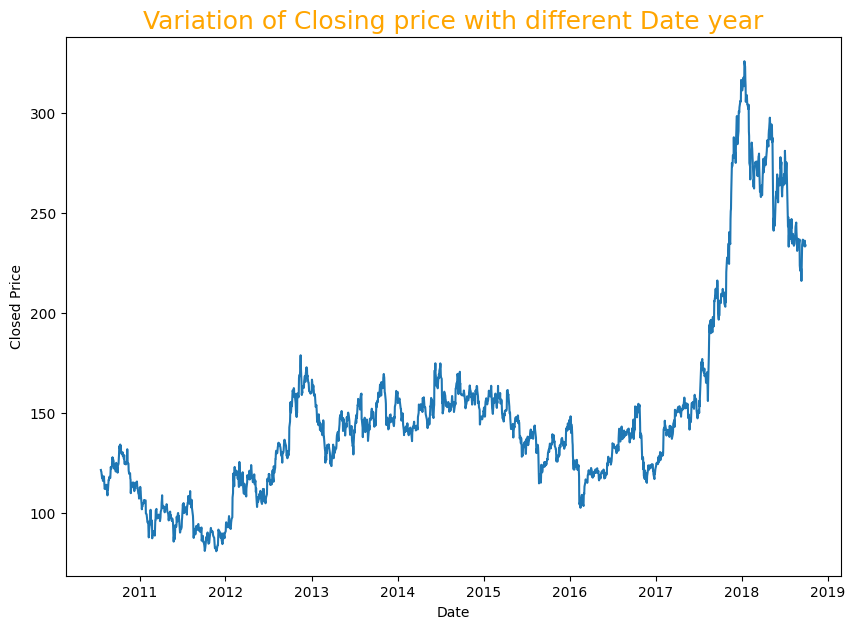

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(copy_data["Date"],
         copy_data["Close"])
plt.xlabel("Date")
plt.ylabel("Closed Price");
plt.title("Variation of Closing price with different Date year",
          color="orange",
          fontsize=18);

In [ ]:
close_data = copy_data["Close"]
close_data

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [ ]:
close_data.size

2035

In [ ]:
close_data.shape

(2035,)

In [ ]:
close_data.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2035 entries, 0 to 2034
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
2035 non-null   float64
dtypes: float64(1)
memory usage: 16.0 KB


In [ ]:
close_data.describe()

count    2035.00000
mean      149.45027
std        48.71204
min        80.95000
25%       120.05000
50%       141.25000
75%       156.90000
max       325.75000
Name: Close, dtype: float64

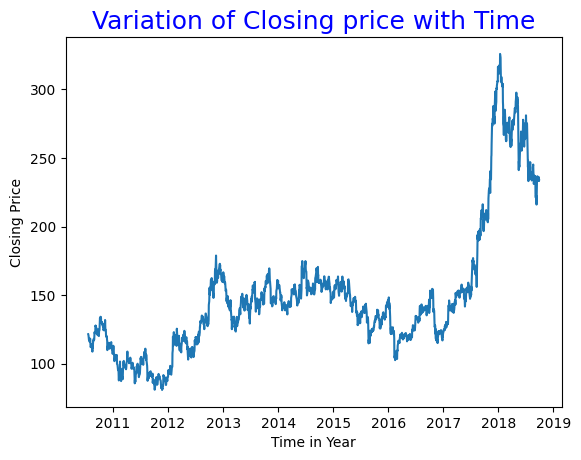

In [ ]:
plt.plot(copy_data.Date, close_data)
plt.xlabel("Time in Year")
plt.ylabel("Closing Price");
plt.title("Variation of Closing price with Time",
          color="blue",
          fontsize=18);

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler(feature_range=(0,1)) # (0,1) by default.But mentioned for understanding
close_data = minmax.fit_transform(np.array(close_data).reshape(-1, 1))
close_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

### Splitting the data into training & testing sets

In [ ]:
train_size = int(len(close_data)*0.7)
test_size = len(close_data) - train_size
train_data = close_data[:train_size, :] # Slicing row from 0 to train_size indexlocation but column is kept unsliced.
test_data = close_data[train_size:len(close_data), :1]

In [ ]:
train_data.shape

(1424, 1)

In [ ]:
test_data.shape

(611, 1)

In [ ]:
1424 + 611

2035

In [ ]:
test_data[:10]

array([[0.1621732 ],
       [0.15951797],
       [0.16707516],
       [0.15992647],
       [0.16053922],
       [0.16441993],
       [0.16687092],
       [0.1693219 ],
       [0.16074346],
       [0.15972222]])

In [ ]:
def create_dataset(dataset, time_step):
    X_data = []
    Y_data = []
    for i in range(len(dataset)-time_step-1):
        X_data.append(dataset[i:(i+time_step), 0])
        Y_data.append(dataset[i+time_step, 0])
    return np.array(X_data), np.array(Y_data)


In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
X_train.shape

(1323, 100)

In [ ]:
y_train.shape

(1323,)

In [ ]:
X_test.shape, y_test.shape

((510, 100), (510,))

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### Model Building & Testing

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1))) #Input layer with 50 neurons
model.add(LSTM(50, return_sequences=True)) # Hidden layers with 50 neurons
model.add(LSTM(50))
model.add(Dense(1))# Output Layer
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, verbose=1);

Epoch 1/10
21/21 [==============================] - 14s 320ms/step - loss: 0.0087 - val_loss: 0.0164
Epoch 2/10
21/21 [==============================] - 4s 168ms/step - loss: 0.0017 - val_loss: 0.0050
Epoch 3/10
21/21 [==============================] - 3s 122ms/step - loss: 9.0615e-04 - val_loss: 0.0033
Epoch 4/10
21/21 [==============================] - 3s 122ms/step - loss: 8.4378e-04 - val_loss: 0.0044
Epoch 5/10
21/21 [==============================] - 3s 123ms/step - loss: 8.0761e-04 - val_loss: 0.0044
Epoch 6/10
21/21 [==============================] - 3s 140ms/step - loss: 7.8900e-04 - val_loss: 0.0029
Epoch 7/10
21/21 [==============================] - 3s 130ms/step - loss: 7.6486e-04 - val_loss: 0.0027
Epoch 8/10
21/21 [==============================] - 3s 122ms/step - loss: 7.4807e-04 - val_loss: 0.0031
Epoch 9/10
21/21 [==============================] - 3s 123ms/step - loss: 6.8745e-04 - val_loss: 0.0042
Epoch 10/10
21/21 [==============================] - 3s 122ms/step - lo

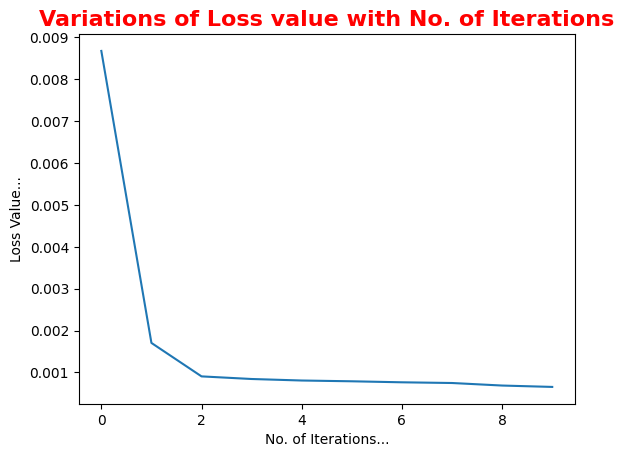

In [ ]:
loss = model.history.history['loss']
plt.plot(loss)
plt.xlabel("No. of Iterations...")
plt.ylabel("Loss Value...")
plt.title("Variations of Loss value with No. of Iterations", color="red", fontsize=16, fontweight="bold");

In [ ]:
train_preds = minmax.inverse_transform(model.predict(X_train))
test_preds = minmax.inverse_transform(model.predict(X_test))

16/16 [==============================] - 0s 26ms/step


In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
math.sqrt(mean_squared_error(y_train,train_preds))

134.97293496953864

In [ ]:
math.sqrt(mean_squared_error(y_test, test_preds))

205.2865270912785

In [ ]:
close_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [ ]:
train_preds.shape

(1323, 1)

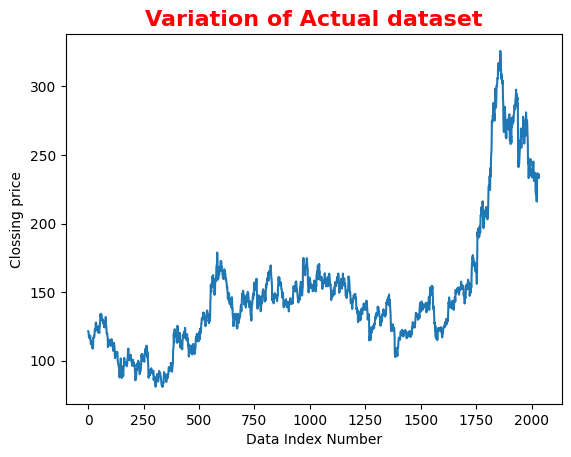

In [ ]:
# shift train predictions for plotting

look_back=100  # to align predicted and actual on same curve...

trainPredictPlot = np.empty_like(close_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_preds)+look_back, :] = train_preds

# shift test predictions for plotting
testPredictPlot = np.empty_like(close_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_preds)+(look_back*2)+1:len(close_data)-1, :] = test_preds

# plot baseline i.e. Actual value of Closing price..

plt.plot(minmax.inverse_transform(close_data))
plt.title("Variation of Actual dataset", color="red", fontsize=16, fontweight="bold")
plt.xlabel("Data Index Number")
plt.ylabel("Clossing price");

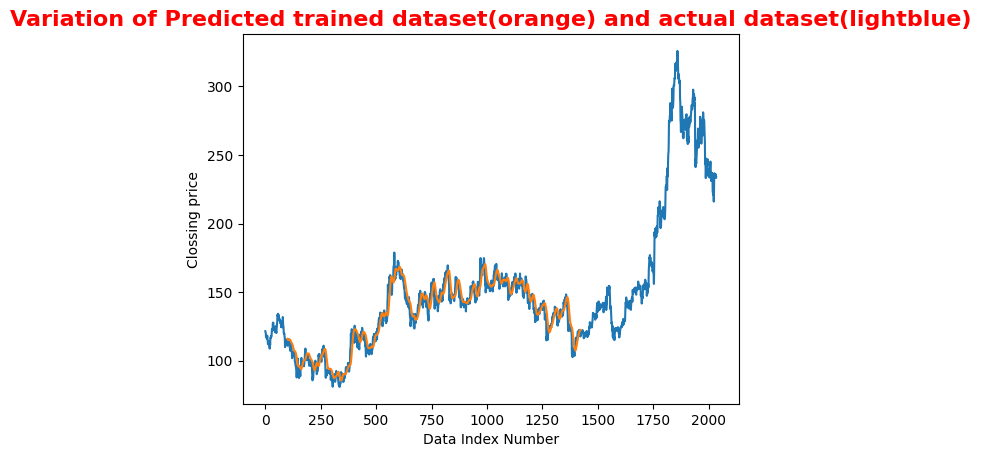

In [ ]:
# Plot of Predictions on Closing Price made by our model on training dataset vs Actual Closing Price

plt.plot(minmax.inverse_transform(close_data))
plt.plot(trainPredictPlot)
plt.title("Variation of Predicted trained dataset(orange) and actual dataset(lightblue)", color="red", fontsize=16, fontweight="bold")
plt.xlabel("Data Index Number")
plt.ylabel("Clossing price");

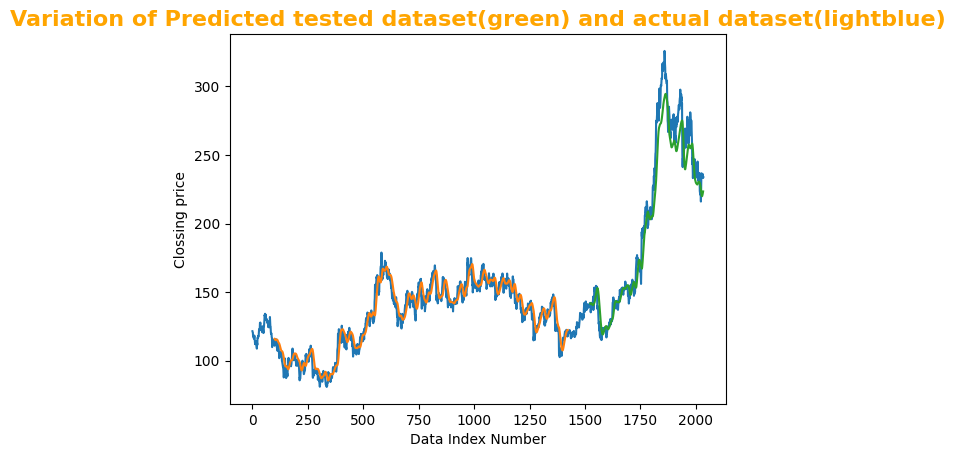

In [ ]:
# Plot of Predictions on Closing Price made by our model on training dataset vs Actual Closing Price
# vs Predictions on CLosing Price made by our model on test dataset

plt.plot(minmax.inverse_transform(close_data))
plt.plot(trainPredictPlot)
plt.title("Variation of Predicted tested dataset(green) and actual dataset(lightblue)", color="orange", fontsize=16, fontweight="bold")
plt.xlabel("Data Index Number")
plt.ylabel("Clossing price");
plt.plot(testPredictPlot)
plt.show()

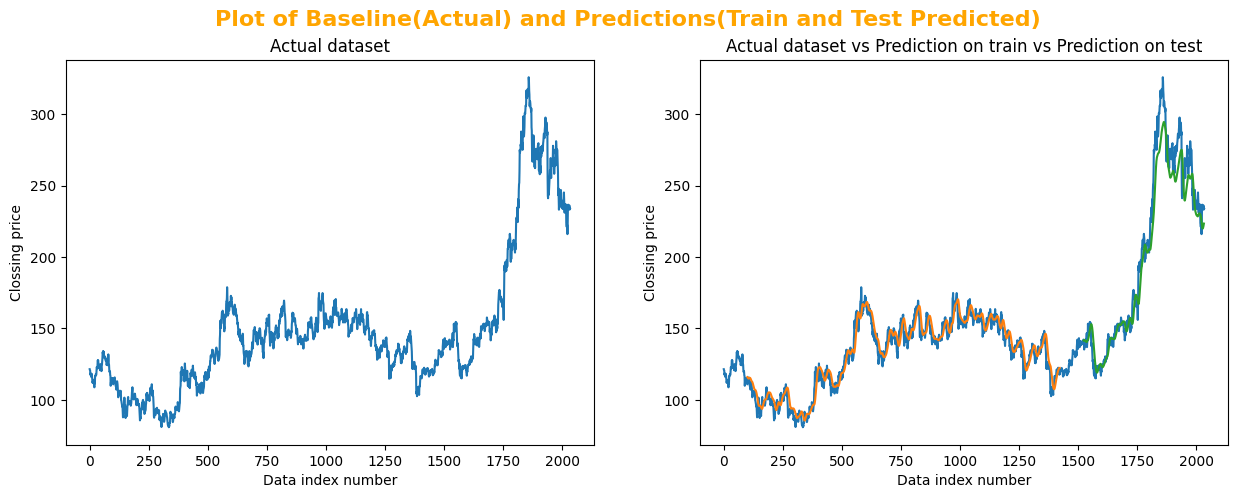

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(15,5))
ax0.plot(minmax.inverse_transform(close_data))
ax0.set(xlabel="Data index number",
        ylabel="Clossing price",
        title="Actual dataset");

ax0.set(xlabel="Data index number",
        ylabel="Clossing price",
        title="Actual dataset");

ax1.plot(minmax.inverse_transform(close_data))
ax1.plot(trainPredictPlot)
ax1.plot(testPredictPlot)


ax1.set(xlabel="Data index number",
        ylabel="Clossing price",
        title="Actual dataset vs Prediction on train vs Prediction on test");

fig.suptitle(t="Plot of Baseline(Actual) and Predictions(Train and Test Predicted)",
             color="orange",
             fontsize=16,
             fontweight="bold");

In [ ]:
preds_input = test_data[511:]
preds_input[:5]

array([[0.85273693],
       [0.86213235],
       [0.83455882],
       [0.84375   ],
       [0.71466503]])

In [ ]:
preds_input.shape

(100, 1)

In [ ]:
# Reshaping into row matrix

preds_input = preds_input.reshape(1, -1)
preds_input.shape

(1, 100)

In [ ]:
temp_input = list(preds_input)
len(temp_input)

1

In [ ]:
temp_input = temp_input[0].tolist()
len(temp_input)

100

In [ ]:
preds_input.shape[1]

100

In [ ]:
Thirty_days_output=[]
i=0

while(i<30):
    if(len(temp_input)>100):
        temp_input = temp_input[1:]
        preds_input=np.array(temp_input) # getting latest 100 data
        preds_input=preds_input.reshape(1,-1)



    preds_input = preds_input.reshape((1, time_step,1))
    day_output = model.predict(preds_input, verbose=0)
    temp_input.extend(day_output[0].tolist())
    Thirty_days_output.extend(day_output.tolist())

    #print(f"Day-{i+1} input:\n\n{preds_input}\n\n")
    #print(f"Day-{i+1} output:\n\n{day_output}\n\n")
    i=i+1

In [ ]:
print(Thirty_days_output)

[[0.5892513394355774], [0.5916497707366943], [0.5927582383155823], [0.5926708579063416], [0.591589629650116], [0.5897446274757385], [0.5873492956161499], [0.5845819711685181], [0.5815805196762085], [0.5784448981285095], [0.5752446055412292], [0.5720248222351074], [0.5688139796257019], [0.565628707408905], [0.5624784827232361], [0.5593680143356323], [0.5562999248504639], [0.5532750487327576], [0.5502945184707642], [0.5473586916923523], [0.5444684624671936], [0.5416244864463806], [0.5388273596763611], [0.5360779762268066], [0.5333765149116516], [0.5307238698005676], [0.5281200408935547], [0.5255653262138367], [0.523059606552124], [0.5206026434898376]]


In [ ]:
latest_100_days = np.arange(1,101)
predicted_30_days = np.arange(101,131)

In [ ]:
len(close_data)

2035

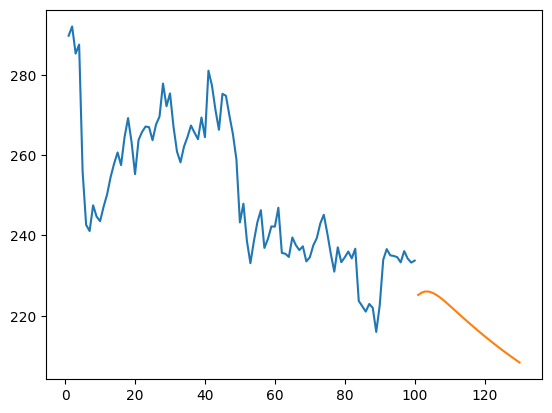

In [ ]:
Latest_100_days_output = close_data[1935:]
plt.plot(latest_100_days, minmax.inverse_transform(Latest_100_days_output))
plt.plot(predicted_30_days, minmax.inverse_transform(Thirty_days_output));

In [ ]:
type(Latest_100_days_output), type(Thirty_days_output)

(numpy.ndarray, list)

In [ ]:
Latest_100_days_output_list = Latest_100_days_output.tolist()
Latest_100_days_output_list.extend(Thirty_days_output)
print(len(Latest_100_days_output_list))

130


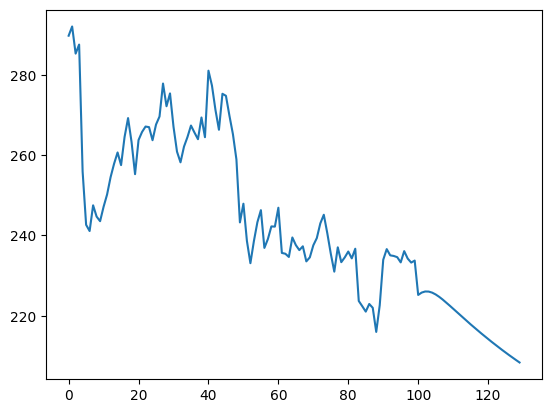

In [ ]:
plt.plot(minmax.inverse_transform(Latest_100_days_output_list));